In [89]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from scipy.special import softmax
import numpy as np
import pandas as pd
from tqdm import tqdm

In [64]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

In [65]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [87]:
def polarity_scores_roberta(text):
    labels = [-1, 0, 1]
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    i, = np.where(scores == scores.max())
    return scores_dict, labels[i[0]]

## Bitcoin

In [190]:
btc_df = pd.read_csv(f'BTC_Tweets.csv', index_col=0)

In [191]:
btc_df.head()

,Date,Retweet,Reply,Likes,Tweet
0,2021-08-01 12:14:58+00:00,2125,1146,14393,A node is an altar to truth. A wallet is a wea...
1,2021-08-01 06:52:59+00:00,2125,484,13517,"#bitcoin July closing price $41,490 ... it bou..."
2,2021-08-01 05:33:57+00:00,3259,952,12759,Bitcoin mining is really bad for the environme...
3,2021-08-01 05:05:19+00:00,1786,27,11749,You can't stop #bitcoin by talking badly about...
4,2021-08-01 20:30:14+00:00,6714,4689,10799,📣 Wierd Finance Airdrop is live!\n\n🏆 Reward f...


In [193]:
roberta_result = {}
classes = []
for i, row in tqdm(btc_df.iterrows(), total=len(btc_df)):
    text = row['Tweet']
    result = polarity_scores_roberta(text)
    roberta_result[i] = {**result[0]}
    classes.append(result[1])

  8%|▊         | 1431/17835 [02:33<32:06,  8.52it/s]  

In [ ]:
btc_df.join(pd.DataFrame(roberta_result).T)
btc_df['classes'] = classes

btc_df.head()

## Ethereum

In [183]:
eth_df = pd.read_csv(f'ETH_Tweets.csv', index_col=0)

In [184]:
eth_df.head()

,Date,Retweet,Reply,Likes,Tweet
0,2021-08-01 20:30:14+00:00,6714,4689,10799,📣 Wierd Finance Airdrop is live!\n\n🏆 Reward f...
1,2021-08-01 13:00:36+00:00,2360,77,10282,Crypto bro learns a valuable lesson about nfts...
2,2021-08-01 01:18:44+00:00,13506,9008,7084,"$500 CRYPTO || 6,8 JUTA IDR\n|| one winner || ..."
3,2021-08-01 06:31:45+00:00,13546,5853,6982,"$500 CRYPTO || 6,8 JUTA IDR\n|| one winner || ..."
4,2021-08-01 13:33:00+00:00,323,280,6536,Only future #crypto millionaires or billionair...


In [185]:
roberta_result = {}
classes = []
for i, row in tqdm(eth_df.iterrows(), total=len(eth_df)):
    text = row['Tweet']
    result = polarity_scores_roberta(text)
    roberta_result[i] = {**result[0]}
    classes.append(result[1])

100%|██████████| 16170/16170 [31:41<00:00,  8.50it/s]


In [188]:
eth_df = eth_df.join(pd.DataFrame(roberta_result).T)
eth_df['classes'] = classes

,Date,Retweet,Reply,Likes,Tweet,classes,roberta_neg,roberta_neu,roberta_pos
0,2021-08-01 20:30:14+00:00,6714,4689,10799,📣 Wierd Finance Airdrop is live!\n\n🏆 Reward f...,0,0.007581,0.673813,0.318606
1,2021-08-01 13:00:36+00:00,2360,77,10282,Crypto bro learns a valuable lesson about nfts...,0,0.017721,0.492217,0.490062
2,2021-08-01 01:18:44+00:00,13506,9008,7084,"$500 CRYPTO || 6,8 JUTA IDR\n|| one winner || ...",0,0.042528,0.799713,0.157758
3,2021-08-01 06:31:45+00:00,13546,5853,6982,"$500 CRYPTO || 6,8 JUTA IDR\n|| one winner || ...",0,0.040356,0.834890,0.124755
4,2021-08-01 13:33:00+00:00,323,280,6536,Only future #crypto millionaires or billionair...,1,0.002724,0.090555,0.906721


In [189]:
eth_df = df.copy()
eth_df.head()

,Date,Retweet,Reply,Likes,Tweet,classes,roberta_neg,roberta_neu,roberta_pos
0,2021-08-01 20:30:14+00:00,6714,4689,10799,📣 Wierd Finance Airdrop is live!\n\n🏆 Reward f...,0,0.007581,0.673813,0.318606
1,2021-08-01 13:00:36+00:00,2360,77,10282,Crypto bro learns a valuable lesson about nfts...,0,0.017721,0.492217,0.490062
2,2021-08-01 01:18:44+00:00,13506,9008,7084,"$500 CRYPTO || 6,8 JUTA IDR\n|| one winner || ...",0,0.042528,0.799713,0.157758
3,2021-08-01 06:31:45+00:00,13546,5853,6982,"$500 CRYPTO || 6,8 JUTA IDR\n|| one winner || ...",0,0.040356,0.834890,0.124755
4,2021-08-01 13:33:00+00:00,323,280,6536,Only future #crypto millionaires or billionair...,1,0.002724,0.090555,0.906721


In [124]:
dff = pd.read_csv(r'ETH_tweet_perday.csv', index_col=0)

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

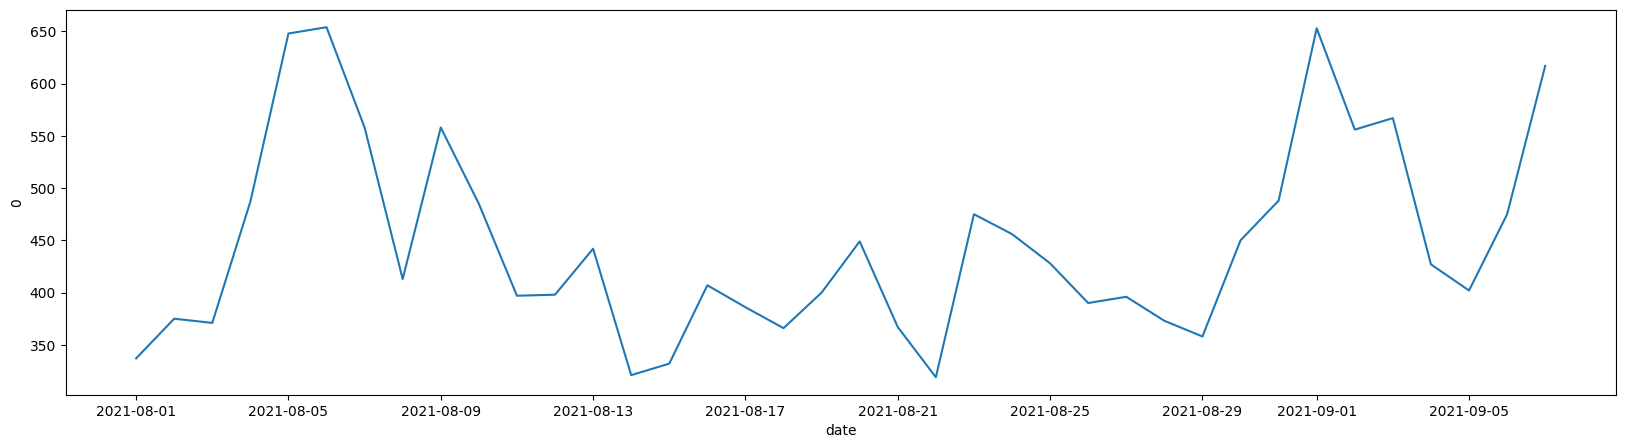

In [186]:
date = []
for i in range(38):
    date.append(pd.to_datetime('2021-08-01') + pd.Timedelta(days=i))

dff['date'] = date
fig = plt.figure(figsize=(20, 5))
sns.lineplot(x='date', y='0', data=dff)
plt.show()